## Necessary Imports 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC

## Implementing ML Models for each dataset: 

In [3]:
regression1 = pd.read_csv('regression_1.csv')
regression2 = pd.read_csv('regression_2.csv')
classification = pd.read_csv('classification.csv')


In [44]:
classification.head(1)

,x1,x2,label
0,-10.09795,-3.23026,1


In [19]:
reg_model_1 = LinearRegression().fit(regression1.iloc[:, 0].values.reshape(-1,1), regression1.iloc[:, 1])
reg_model_2 = LinearRegression().fit(regression2.iloc[:, 0].values.reshape(-1, 1), regression2.iloc[:, 1])

clf_model = SVC(kernel='linear').fit(classification.iloc[:, :2], classification.iloc[:, 2])

In [16]:
regression1.iloc[:, 0].values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [24]:
reg_model_1,clf_model,reg_model_2

(LinearRegression(), SVC(kernel='linear'), LinearRegression())

## Plotting Models : 

### Regression 1 with fitted line : 

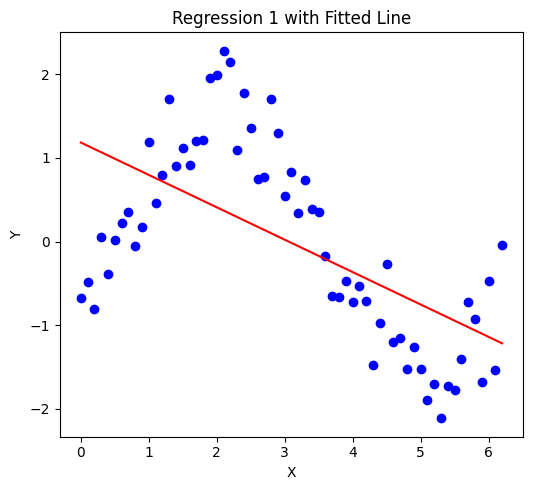

In [34]:
plt.figure(figsize=(15, 5))

# Plotting Regression 1 with fitted line
plt.subplot(1, 3, 1)
plt.scatter(regression1.iloc[:, 0], regression1.iloc[:, 1], color='blue')
plt.plot(regression1.iloc[:, 0], reg_model_1.predict(regression1.iloc[:, 0].values.reshape(-1, 1)), color='red')
plt.title('Regression 1 with Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

### Regression 2 with fitted line : 

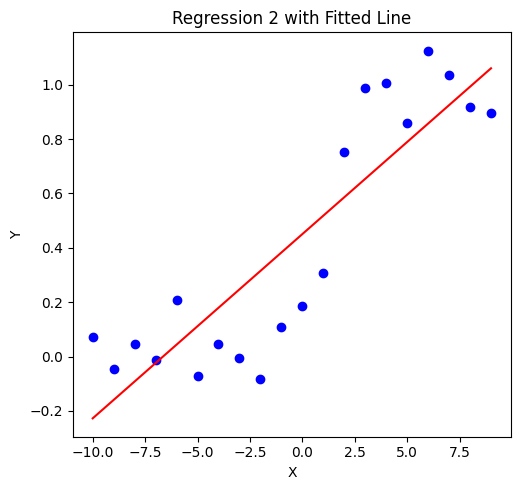

In [35]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.scatter(regression2.iloc[:, 0], regression2.iloc[:, 1], color='blue')
plt.plot(regression2.iloc[:, 0], reg_model_2.predict(regression2.iloc[:, 0].values.reshape(-1, 1)), color='red')
plt.title('Regression 2 with Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

## Using a polynomial model as this dosen't looks good : 

In [46]:
from sklearn.preprocessing import PolynomialFeatures


In [47]:
# Polynomial feature transformer (degree can be tuned)
poly_features = PolynomialFeatures(degree=2)

# Transform the features into polynomial features
X_poly = poly_features.fit_transform(regression2.iloc[:, 0].values.reshape(-1, 1))

# Creating a regression model and fit it on the polynomial features
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, regression2.iloc[:, 1])

LinearRegression()

Text(0, 0.5, 'Y')

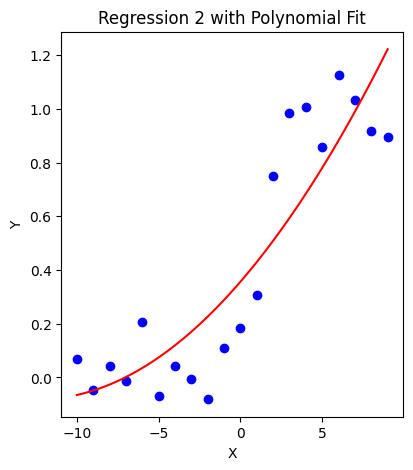

In [48]:
plt.figure(figsize=(15, 5))
# Regression 2 with Polynomial Regression
plt.subplot(1, 3, 2)
# Generate a range of values from min to max x
x_range = np.linspace(regression2.iloc[:, 0].min(), regression2.iloc[:, 0].max(), 100).reshape(-1, 1)
# Transform the range into polynomial features
x_range_poly = poly_features.transform(x_range)
plt.scatter(regression2.iloc[:, 0], regression2.iloc[:, 1], color='blue')
plt.plot(x_range, poly_reg_model.predict(x_range_poly), color='red')
plt.title('Regression 2 with Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')


#### Comments about the graphs in Regression 1 and 2 : 

<b>Regression 1:</b> The linear regression model was chosen due to the apparent linear trend in the data, with the fitted line closely following the central tendency of the data points.
<br><br>
<b>Regression 2:</b> A polynomial regression model was used to capture the non-linear trend observed in the data. The second-degree polynomial appears to provide a good fit, modeling the curvature observed among the data points without appearing to overfit. The degree of the polynomial was chosen based on the fit and the general principle of parsimony, aiming to keep the model as simple as possible while still capturing the underlying pattern.

### Plotting Classification with decision boundary


/home/harsh/.local/share/virtualenvs/DataScience_Survival_Skills-l0MxnZLg/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


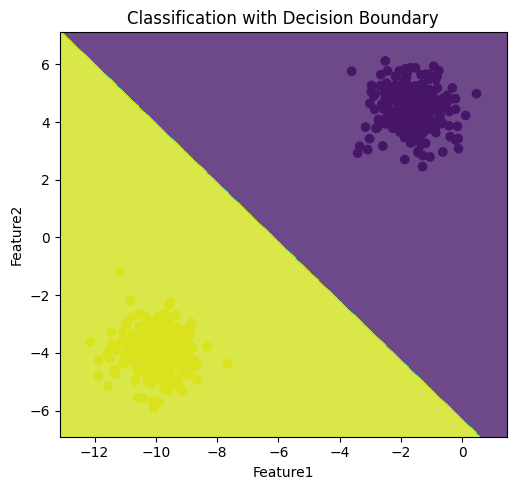

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
plt.scatter(classification.iloc[:, 0], classification.iloc[:, 1], c=classification.iloc[:, 2])

# mesh creation for decision boundaries
x_min, x_max = classification.iloc[:, 0].min() - 1, classification.iloc[:, 0].max() + 1
y_min, y_max = classification.iloc[:, 1].min() - 1, classification.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.title('Classification with Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.tight_layout()
plt.show()


#### Comments about the graphs in Classification model: 

<b>Classification:</b> A linear SVM was used, and the resulting decision boundary shows a good separation of the two classes. This model choice is supported by the initial visual assessment that the classes are fairly linearly separable.

### All 3 Plots together (Same code as above)

/home/harsh/.local/share/virtualenvs/DataScience_Survival_Skills-l0MxnZLg/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


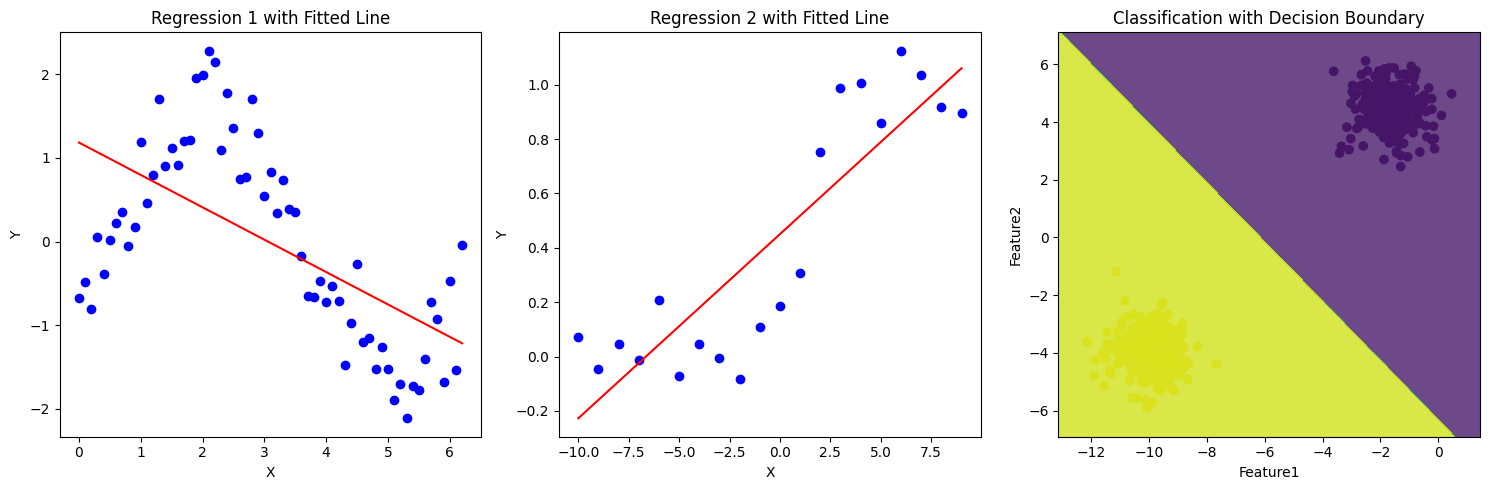

In [42]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(regression1.iloc[:, 0], regression1.iloc[:, 1], color='blue')
plt.plot(regression1.iloc[:, 0], reg_model_1.predict(regression1.iloc[:, 0].values.reshape(-1, 1)), color='red')
plt.title('Regression 1 with Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 3, 2)
plt.scatter(regression2.iloc[:, 0], regression2.iloc[:, 1], color='blue')
plt.plot(regression2.iloc[:, 0], reg_model_2.predict(regression2.iloc[:, 0].values.reshape(-1, 1)), color='red')
plt.title('Regression 2 with Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 3, 3)
plt.scatter(classification.iloc[:, 0], classification.iloc[:, 1], c=classification.iloc[:, 2])
# mesh creation for decision boundaries
x_min, x_max = classification.iloc[:, 0].min() - 1, classification.iloc[:, 0].max() + 1
y_min, y_max = classification.iloc[:, 1].min() - 1, classification.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.title('Classification with Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.tight_layout()
plt.show()
